In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import pandas as pd 

## 就是与之前的一样，我们分离数据后，测试数据的mean std也是训练数据的，不能用测试数据集的mean std来替代，很重要的

#### 最后的衡量标准 /m ，均方误差MSE 1/m* (从1乘到m)（ y^(i)-y(预测)^(i) ）**2
#### 这个是重要的，一定要记住
#### 还有的问题是需要将这个 MSE进行开方，成为 RMSE 均方根误差
#### 平均绝对误差 1/m * | y(i)-y(预测)(i) |  MAE
#### 训练的方法和在测评的时候 方法是不一样的

### 波士顿房价

In [2]:
bost=datasets.load_boston()

In [3]:
bost.data
bost.data.shape  #一共506个样例，13个特征

(506, 13)

In [4]:
print(bost.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
bost.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
x=bost.data[:,5]
print(x.shape)
y=bost.target
print(y.shape)

(506,)
(506,)


## 这里有一个很重要的点是，我们的图像可能有一些我们收集数据时候的最大极值点，我们需要将他们删除去掉

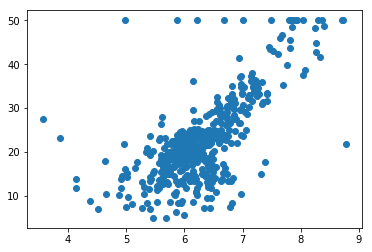

In [7]:
plt.scatter(x,y)
plt.show()

In [8]:
np.max(y)

50.0

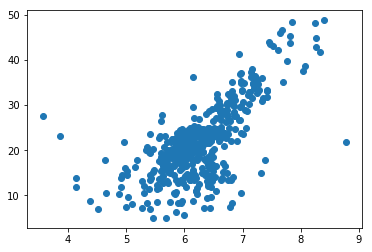

In [9]:
x=x[y<50] 
y=y[y<50]
plt.scatter(x,y)
plt.show()

#### 简单的回归方程预测

In [10]:
import sys
sys.path.append(r'D:\pycharm\untitled')
from KNN.simple_linear_regression import Simplelinearregression2
from KNN.train_test_split import train_text_split


In [11]:
x_train,y_train ,x_test,y_test=train_text_split(x,y,0.2,100)

In [12]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(392,)
(392,)
(98,)
(98,)


In [13]:
sim=Simplelinearregression2()
sim.fit(x_train,y_train)
print(sim.a_)
print(sim.b_)

7.9373860103430705
-27.72893988154581


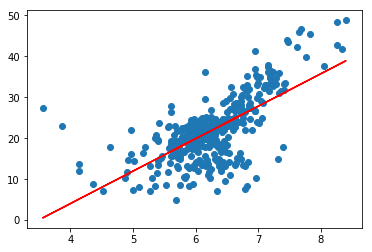

In [14]:

plt.scatter(x_train,y_train)
plt.plot(x_train,sim.predict(x_train),color='r') #进行画直线
plt.show()


In [15]:
y_predict=sim.predict(x_test)
print(y_predict)

[16.21242907 41.96130929 21.27648135 36.31782784 12.0532388  27.67401447
 22.73696037 25.11023879 23.05445581 23.20526615 22.87189593 18.48252147
 23.65769715 21.72097496 19.00638895  9.19577984 24.60224608 19.03020111
 19.67312937 20.86373727 18.90320293 18.87939077 25.24517435 21.49872815
 18.70476828 24.22918894 23.26876523 27.49145459 20.98279806 19.37944609
 22.00672086 25.57060718 22.91158286 17.01410506 19.30800962 26.24528499
 19.91918834 21.10185885 20.7923008  23.34020171 19.08576281 24.27681326
 18.863516   19.77631539 23.20526615 19.51438165 16.69660962 16.0854309
 29.95204426 18.26027466 26.72152815 19.38738348 21.02248499 17.58559685
 22.41152755 23.03064365 11.21187589 20.14143515 19.79219016 37.88149288
 22.53852572 34.60335246 15.55362603 18.98257679 21.57016463 23.7450084
 20.91929898 12.24373607 31.96020292 18.411085   15.24406798 16.4823002
 14.37095552 15.347254   26.83265155 33.31749592 23.5148242  21.26060657
 19.78425278 22.37184062 18.72064305 20.80023819 21.18

## MSE

In [16]:
mse_test=np.sum((y_predict-y_test)**2)/len(y_test)
print(mse_test)

35.73432129917397


## RMSE

In [17]:
from math import sqrt
rmse=sqrt(mse_test)
print(rmse)

5.977819108937136


## MAE

In [18]:
mae_test=np.sum(np.absolute(y_predict-y_test)) /len(y_test)
print(mae_test)

4.34757703830181


In [19]:
from KNN.accuracy import mse,mae,rmse
from math import sqrt

In [20]:
mse(y_test,y_predict)

35.73432129917397

In [21]:
rmse(y_test,y_predict)

5.977819108937136

In [22]:
mae(y_test,y_predict)

4.34757703830181

### 下面就是 sklearn 中的相关操作

In [23]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [24]:
mean_absolute_error(y_test,y_predict)  #mae

4.34757703830181

In [25]:
mean_squared_error(y_test,y_predict)  #mse

35.73432129917397

In [26]:
sqrt(mean_squared_error(y_test,y_predict))    #rmse

5.977819108937136

## mse会放大一些误差大的误差，所以误差有点大

# 上面虽说有三个评价估计，但是我们会使用mse 来当作误差评价估计

## 新的指标

## R Square
R^2=1-  ss(residual)/ss(total)

In [27]:
#### 分母是我们模型预测之间的产生的错误，使用回归方程
#### 分子是使用 y=y(平均值) 预测产生的错误，分子的错误是比较多的
#### 就是将评价指标定在了 0~1 之间，还有看是否大于0，来看是否 适合线性回归模型

#### R^(2) 是越大越好的，因为是1-嘛，这个方法就是将评价标准 定在了0~1之间。
#### R^(2) 越大，说明你的模型比基准模型好，R^2   越大越好
#### 如果R^2==0,  说明是你的模型与基准模型一样的
#### 如果R^2<0 ，说明你的模型比 基准模型还差，很有可能说明  本数据不能使用线性模型来拟合

## 然后对R^2 进行进一步的推算
其实就是 1- mse/var(y) var是方差

# R Square

In [28]:
1-mse(y_test,y_predict) / np.var(y_test)  

0.5275038981000738

In [29]:
from KNN.accuracy import R_S

In [30]:
R_S(y_test,y_predict)   #直接调用这些东西

0.5275038981000738

### sklearn 进行求解

In [31]:
from sklearn.metrics import r2_score

In [34]:
r2_score(y_test,y_predict)

0.5275038981000738

In [33]:
sim.score(x_test,y_test)   #进行封装了，上面写的都是 自己写的类

0.5275038981000738